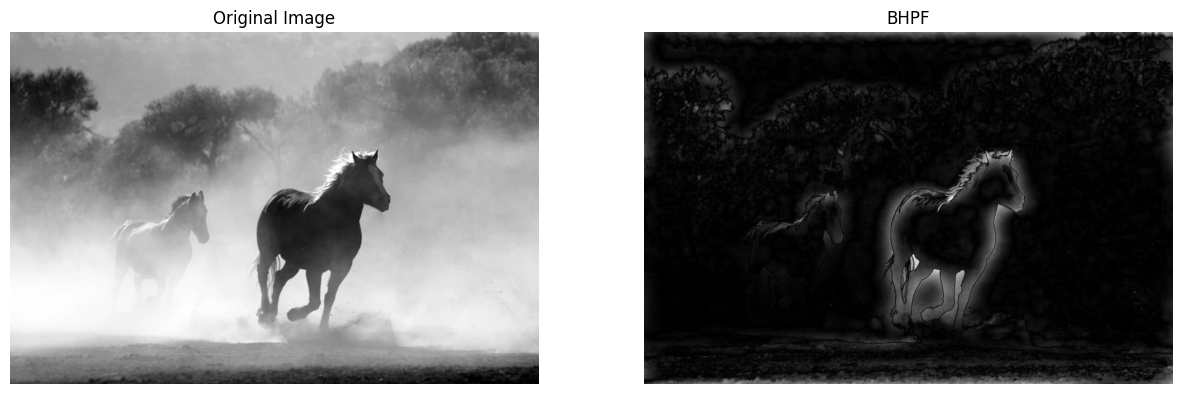

In [4]:
#sarinakasaiyan

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Reading input image
input_image = plt.imread('/content/Butterworth_High_Pass_Filter.jpg')

# Checking if the image is already grayscale
if input_image.ndim == 3:
    input_image = rgb2gray(input_image)

# Saving the size of the input image in pixels
M, N = input_image.shape

# Getting Fourier Transform of the input image
FT_img = np.fft.fft2(input_image.astype(float))

# Assigning the order value
n = 2

# Assigning Cut-off Frequency
D0 = 10

# Designing filter: Butterworth High Pass Filter
u = np.arange(M)
v = np.arange(N)
idx = u > M/2
u[idx] = u[idx] - M
idy = v > N/2
v[idy] = v[idy] -N


U, V = np.meshgrid(u, v, indexing='ij')

# Calculating Euclidean Distance
D = np.sqrt(U**2 + V**2)

# Determining the filtering mask
H = np.zeros_like(D)
mask = D != 0
H[mask] = 1 / (1 + (D0 / D[mask])**(2*n))

# Check the dimensions of H and FT_img using the size function
x, y = H.shape
x1, y1 = FT_img.shape

# We used pad function beceause the dimensions of the two arrays being multiplied do not match
pad_size = (x1-x, y1-y)
H_padded = np.pad(H, pad_size, 'constant')

# Convolution between the Fourier Transformed image and the mask
resized_img = FT_img * H_padded

# Getting the resultant image by Inverse Fourier Transform of the convoluted image
G = np.fft.ifft2(resized_img)

resultant_image = np.abs(G)

# Displaying the resultant image
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resultant_image, cmap='gray')
plt.title('BHPF')
plt.axis('off')

plt.show()
